In [1]:
Question 1
SVM classifier has quick training time with large dataset. - FALSE
-- Because the SVM algorithm calculations are linearly dependent on the number of    rows in the dataset, the training time will not be quick for large dataset.



SVM classifier does not perform well when the number of dimensions is more than number of records. - FALSE
-- Having more features reduces the need for optimization as more decision boundaries can be created easily.



SVM classifier can handle both linearly and nonlinearly separable datasets. - TRUE
-- This can be done using different kernels.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',', 
                 names=['Sample code number: id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])  
df.shape

df.head()
df.describe()


(699, 11)

,Sample code number: id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


,Sample code number: id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [21]:
for col in df.columns: 
    if col !='Sample code number: id number':
        print(col, df[col].unique())

        
# Bare Nuclei has a question mark and 
# Bare Nuclei - data is of string type which needs to be converted to numeric

df['Bare Nuclei'].value_counts()

# replacing with max count
df['Bare Nuclei'].replace('?', 1, inplace= True)

df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])

Clump Thickness [ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size [ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei [ 1 10  2  4  3  9  7  5  8  6]
Bland Chromatin [ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli [ 1  2  7  4  5  3 10  6  9  8]
Mitoses [ 1  5  4  2  3  7 10  8  6]
Class [2 4]


1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [110]:
y = df[['Class']]
#X = data.drop(['Purchased','User ID'], axis=1)
X = df.drop(['Class','Sample code number: id number'], axis=1)


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)
#print(scaled_X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X , y, test_size=0.3, random_state=42,stratify =y)



In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Tuning the hyperparameters

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision_macro', verbose=0)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.960 (+/-0.036) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.327 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.040) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.033) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.040) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.040) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.967 (+/-0.043) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.962 (+/-0.040) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.969 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.967 (+/-0.043) for {'C': 10, 'kernel': 'linear'}
0.966 (+/-0.042) for {'C': 100, 'kernel': 'linear'}
0.966 (+/-0.042) for {'C': 1000, 'kernel': 'linear'}
0.954 (+/-0.019) for {'C': 1, 'kernel': 'poly'}
0.965 (+/-0.023) for {'C': 10, 'kernel': 'poly'}
0.969 (+/-0.035) for {'C': 100, 'kernel': 'poly'}
0.9

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall_macro', verbose=0)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.949 (+/-0.034) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.037) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.946 (+/-0.027) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.967 (+/-0.030) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.976 (+/-0.037) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.970 (+/-0.041) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.967 (+/-0.030) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.973 (+/-0.033) for {'C': 1, 'kernel': 'linear'}
0.970 (+/-0.041) for {'C': 10, 'kernel': 'linear'}
0.967 (+/-0.038) for {'C': 100, 'kernel': 'linear'}
0.967 (+/-0.038) for {'C': 1000, 'kernel': 'linear'}
0.929 (+/-0.031) for {'C': 1, 'kernel': 'poly'}
0.954 (+/-0.022) for {'C': 10, 'kernel': 'poly'}
0.963 (+/-0.043) for {'C': 100, 'kernel': 'poly'}
0.9

In [114]:
#best parameters - {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

# running for the best results for linear kernel

svc_linear = SVC(C= 1, kernel = 'linear',gamma='auto')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
linear = classification_report(y_test, y_pred_linear)
print(classification_report(y_test, y_pred_linear))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       138
           4       0.93      0.93      0.93        72

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [113]:
# running for the best results for polynomial kernel

svc_poly = SVC(C= 10, kernel = 'poly',gamma='auto')
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)
poly = classification_report(y_test, y_pred_poly)
print(classification_report(y_test, y_pred_poly))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       138
           4       0.95      0.88      0.91        72

    accuracy                           0.94       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



In [115]:
plot = pd.DataFrame(columns=['class_base', 'precision', 'recall','f1_score','support'])

for x in (linear, poly):
    if x == linear: t = 'lin'
    if x == poly: t = 'pol'    
    report_data = []
    lines = x.split('\n')
    for line in lines[2:4]:
        #print(line)
        row = {}
        row_data = line.split('      ')
        row['class_base'] =  row_data[1].strip()
        row['class'] =  t+'_'+row_data[1].strip()
        #print (row_data)
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1_score'] = float(row_data[4])
        row['support'] = float(row_data[5])
        report_data.append(row)    
    dataframe = pd.DataFrame.from_dict(report_data)
    plot = plot.append(dataframe)
    #print (dataframe.head())


plot.head()

,class,class_base,f1_score,precision,recall,support
0,lin_2,2,0.96,0.96,0.96,138.0
1,lin_4,4,0.93,0.93,0.93,72.0
0,pol_2,2,0.96,0.94,0.98,138.0
1,pol_4,4,0.91,0.95,0.88,72.0


Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Scores for Label = 2 by Linear and Polynomial kernals')

[Text(0, 0, 'Accuracy'),
 Text(0, 0, 'Precision'),
 Text(0, 0, 'Recall'),
 Text(0, 0, 'F1-score')]

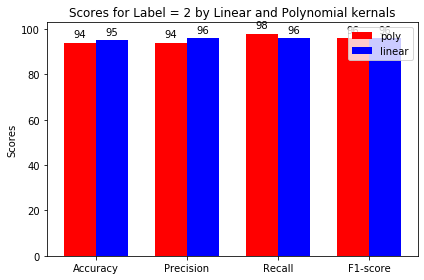

In [116]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Accuracy','Precision', 'Recall',  'F1-score' ]
poly = [94 ,94 ,98 ,96]
linear = [95, 96 ,96,96]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, poly, width, label='poly',color = 'red')
rects2 = ax.bar(x + width/2, linear, width, label='linear',color = 'blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores for Label = 2 by Linear and Polynomial kernals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Scores for Label= 4 by Linear and Polynomial kernals')

[Text(0, 0, 'Accuracy'),
 Text(0, 0, 'Precision'),
 Text(0, 0, 'Recall'),
 Text(0, 0, 'F1-score')]

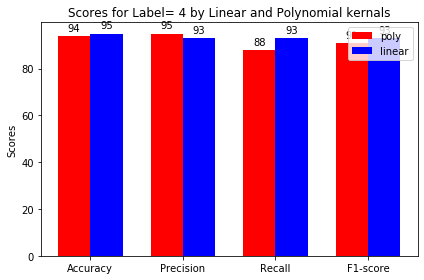

In [117]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Accuracy','Precision', 'Recall',  'F1-score' ]
poly = [94 ,95 ,88 ,91]
linear = [95, 93 ,93,93 ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, poly, width, label='poly',color = 'red')
rects2 = ax.bar(x + width/2, linear, width, label='linear',color = 'blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores for Label= 4 by Linear and Polynomial kernals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()